In [1]:
import os
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### MNIST Performance at Different Resolutions

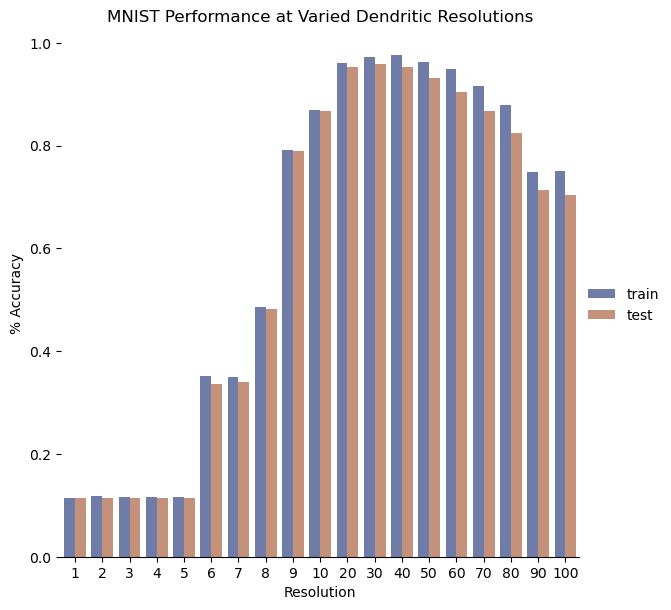

In [2]:
data_dict = {"resolution": [],
             "split": [], 
             "accuracy": []}

path_to_root = "work_dir/mnist_dendfc_resolution_testing"
for folder in os.listdir(path_to_root):
    if "mnist_dendfc_" in folder:
        path_to_training_log = os.path.join(path_to_root, folder, "log.pkl")
        path_to_training_args = os.path.join(path_to_root, folder, "training_args.pkl")

        with open(path_to_training_log, "rb") as f:
            log = pickle.load(f)

        with open(path_to_training_args, "rb") as f:
            args = pickle.load(f)

        resolution = args["resolution"]
        best_train_acc = max(log["training_acc"])
        best_test_acc = max(log["testing_acc"])

        data_dict["resolution"].append(resolution)
        data_dict["split"].append("train")
        data_dict["accuracy"].append(best_train_acc)

        data_dict["resolution"].append(resolution)
        data_dict["split"].append("test")
        data_dict["accuracy"].append(best_test_acc)

data = pd.DataFrame(data_dict)

g = sns.catplot(
    data=data, kind="bar",
    x="resolution", y="accuracy", hue="split",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("Resolution", "% Accuracy")
g.legend.set_title("")
plt.title("MNIST Performance at Varied Dendritic Resolutions")
plt.show()
